In [1]:
import pandas as pd
import pickle
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pickle.load(open('/Users/saklenshaikh/Desktop/Ds Term 2/Ims-Final-Project/Snapdeal/SnapDealtweet_data.pkl','rb'))

In [5]:
data.head()

,Date,user,Tweet
0,2022-09-09 14:27:09+00:00,snapdeal,Find your brahmastra of style with Ranbir Kapo...
1,2022-09-09 09:11:21+00:00,snapdeal,Our Astras in this #astraverse are: Good Quali...
2,2022-09-09 06:53:27+00:00,snapdeal,Unstoppable! \nIt's Diamond for our Golden Boy...
3,2022-09-09 05:50:54+00:00,snapdeal,Perfect astra for styling your vastra straight...
4,2022-09-08 18:52:19+00:00,snapdeal,"There will be no one like, her majesty. 70 yea..."


In [6]:
data=pd.DataFrame(data.Tweet)

data.head()

,Tweet
0,Find your brahmastra of style with Ranbir Kapo...
1,Our Astras in this #astraverse are: Good Quali...
2,Unstoppable! \nIt's Diamond for our Golden Boy...
3,Perfect astra for styling your vastra straight...
4,"There will be no one like, her majesty. 70 yea..."


In [10]:
data.iloc[470]

Tweet    Don't let the winter stop you from wearing eth...
Name: 470, dtype: object

# Data Cleaning And Preprocessing

In [11]:
data.Tweet=data.Tweet.str.lower()

In [12]:
data.iloc[470]

Tweet    don't let the winter stop you from wearing eth...
Name: 470, dtype: object

In [13]:
data

,Tweet
0,find your brahmastra of style with ranbir kapo...
1,our astras in this #astraverse are: good quali...
2,unstoppable! \nit's diamond for our golden boy...
3,perfect astra for styling your vastra straight...
4,"there will be no one like, her majesty. 70 yea..."
...,...
4995,"this diwali, add smiles to your heroes’ lives ..."
4996,catch the wednesday #superbazaar with super de...
4997,rishton mein milao aur bhi mithas hamari #diwa...
4998,the 3rd and final question of #optimumnutritio...


In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(Tweet):
    text_nopunt="".join([c 
                         for c in data
                         if c not in string.punctuation])
    return text_nopunt

In [16]:
data.iloc[470]

Tweet    don't let the winter stop you from wearing eth...
Name: 470, dtype: object

In [17]:
data.head()

,Tweet
0,find your brahmastra of style with ranbir kapo...
1,our astras in this #astraverse are: good quali...
2,unstoppable! \nit's diamond for our golden boy...
3,perfect astra for styling your vastra straight...
4,"there will be no one like, her majesty. 70 yea..."


# # Remove URL

\S == Returns a match where the string DOES NOT contain a white space character ( http / www.) (+) == one or more occurance

In [18]:
data.Tweet = data.Tweet.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[470,0]

"don't let the winter stop you from wearing ethnic outfits! \ncheck out the gorgeous winter collection on snapdeal's #toofanisale \n\n#snapdeal #deals #offers #brandwaaliqualitybazaarwaalideal\n#bwqbwd #onlyshoponsnapdeal "

# Remove Number

\d == Returns a match where the string contains digits (numbers from 0-9) (+) == one or more occurance

In [19]:
data['Tweet'] = data['Tweet'].str.replace('\d+','')

In [20]:
data.iloc[470,0]

"don't let the winter stop you from wearing ethnic outfits! \ncheck out the gorgeous winter collection on snapdeal's #toofanisale \n\n#snapdeal #deals #offers #brandwaaliqualitybazaarwaalideal\n#bwqbwd #onlyshoponsnapdeal "

# Removing Stop Words

In [21]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data.iloc[470,0]

"don't let the winter stop you from wearing ethnic outfits! \ncheck out the gorgeous winter collection on snapdeal's #toofanisale \n\n#snapdeal #deals #offers #brandwaaliqualitybazaarwaalideal\n#bwqbwd #onlyshoponsnapdeal "

In [23]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([abc 
                                                      for abc in x.split() # word tokenizer
                                                      if abc not in (stop)]))

In [24]:
data.iloc[470,0]

"let winter stop wearing ethnic outfits! check gorgeous winter collection snapdeal's #toofanisale #snapdeal #deals #offers #brandwaaliqualitybazaarwaalideal #bwqbwd #onlyshoponsnapdeal"

In [25]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package words is already up-to-date!


{'differ',
 'novemarticulate',
 'Scots',
 'Bast',
 'insititious',
 'lauan',
 'spermiduct',
 'espier',
 'undersettling',
 'siphonozooid',
 'Speranza',
 'stravage',
 'raggee',
 'whitehearted',
 'coreign',
 'casalty',
 'guerdoner',
 'dharmasmriti',
 'latitant',
 'phenazone',
 'euphonious',
 'antitwilight',
 'disseminate',
 'pathetically',
 'murmurless',
 'mezereon',
 'financial',
 'colloquy',
 'eunuchoidism',
 'cupric',
 'nonfarm',
 'soapweed',
 'thujone',
 'coalternation',
 'aphototropism',
 'presynaptic',
 'airer',
 'phytology',
 'frowzly',
 'paraconic',
 'phenoplastic',
 'drawboard',
 'xanthophyllous',
 'palynology',
 'strived',
 'organophile',
 'idleship',
 'pharyngic',
 'stickage',
 'conduce',
 'discophoran',
 'burring',
 'effectualness',
 'splendidness',
 'transmissivity',
 'sericeotomentose',
 'separateness',
 'tmesis',
 'uninked',
 'tora',
 'thrushy',
 'surbased',
 'suffixal',
 'choriocapillaris',
 'manship',
 'Caxtonian',
 'unsailed',
 'doorplate',
 'shamaness',
 'coterie',
 'uns

In [26]:
# Apply a second round of cleaning
def clean_text_round2(Tweet):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    Tweet =  re.sub('tweet', '', Tweet) 
    Tweet =  re.sub('snapdeal|@snapdeal','', Tweet)
    Tweet =  re.sub('thank you |thank|thanks','', Tweet)
    Tweet =  re.sub('delivery','delivered', Tweet ) 
    Tweet =  re.sub(r"\b[a-zA-Z]\b", "", Tweet ) ## 1 alphabet like a or s
    Tweet =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", Tweet )  ## 2 alphabet like ab or ad & aA
    Tweet =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(Tweet)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return Tweet

In [27]:
import re

In [28]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.Tweet.apply( lambda x : clean_text_round2(x)))
data.iloc[470,0]


'let winter stop wearing ethnic check gorgeous winter collection'

In [29]:
### Stemming
import nltk

# let's import the libraries
from nltk.stem.snowball import SnowballStemmer

#the most commonly used stemmer
#ss = SnowballStemmer("english") w_tokenizer = nltk.tokenize.WhitespaceTokenizer() lemmatizer = nltk.stem.WordNetLemmatizer()

#def SnowballStemmer_text(text): return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

#data.head()

#data['tweet'] = data.tweet.apply(lambda x :' '.join(SnowballStemmer_text(x))) data.head()

# Lemmatization

In [30]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
def lemmatize_text(Tweet):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(tweet)]

In [32]:
data.iloc[470,0]

'let winter stop wearing ethnic check gorgeous winter collection'

# Strip extra whitespace

In [33]:
data['Tweet'] = (data['Tweet'].astype("str").str.rstrip())

In [34]:
data.iloc[470,0]

'let winter stop wearing ethnic check gorgeous winter collection'

# Finished Data Cleaning

# Term Document Matrix

In [36]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
abdominal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abstract,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,freq
abdominal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
abstract,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,freq
0,abdominal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,abstract,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
332,buy,696
960,fashion,476
1897,perfect,328
2629,style,320
2383,shop,310
206,best,296
2255,sale,285
2941,visit,252
651,day,246
1607,make,237


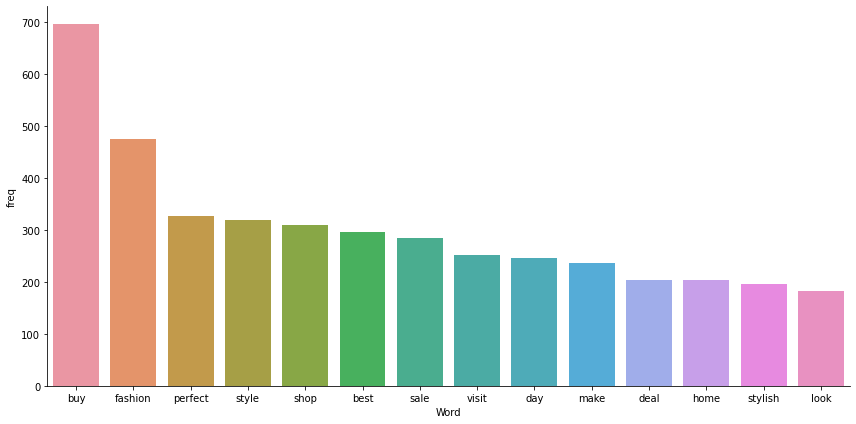

In [42]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=150] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [43]:
Tweet = " ".join(review for review in data.Tweet)
print ("There are {} words in the combination of all review.".format(len(Tweet)))

There are 209672 words in the combination of all review.


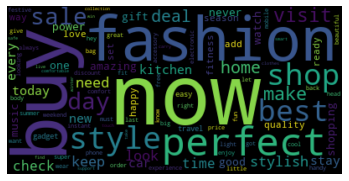

In [44]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="black",
                      collocations=False,
                       max_words=100).generate(Tweet)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [45]:
data

,Tweet
0,find style shop outfit fashion
1,are good quality affordable price free
2,unstoppable diamond golden boy time
3,perfect styling straight outfit fashion
4,one like majesty queen world queen death queen
...,...
4995,add work make day special visit
4996,catch super every hurry
4997,mein special
4998,final question contest forget read


In [46]:
data = data.drop_duplicates(subset='Tweet') 

In [47]:
data

,Tweet
0,find style shop outfit fashion
1,are good quality affordable price free
2,unstoppable diamond golden boy time
3,perfect styling straight outfit fashion
4,one like majesty queen world queen death queen
...,...
4994,healthy indulgence sweet tooth natural nourish...
4995,add work make day special visit
4997,mein special
4998,final question contest forget read


In [48]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['Tweet'].apply(pol)
data.head(5)

,Tweet,polarity
0,find style shop outfit fashion,0.00
1,are good quality affordable price free,0.55
2,unstoppable diamond golden boy time,0.30
3,perfect styling straight outfit fashion,0.60
4,one like majesty queen world queen death queen,0.00


In [49]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Tweet,polarity,Sentiment
0,find style shop outfit fashion,0.00,Positive
1,are good quality affordable price free,0.55,Positive
2,unstoppable diamond golden boy time,0.30,Positive
3,perfect styling straight outfit fashion,0.60,Positive
4,one like majesty queen world queen death queen,0.00,Positive


<AxesSubplot:>

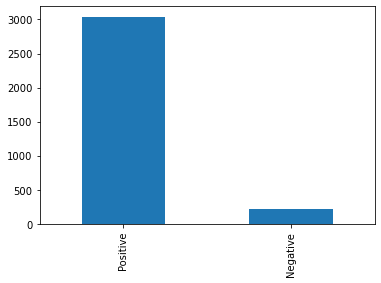

In [50]:
data.Sentiment.value_counts().plot.bar()

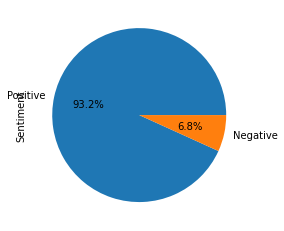

In [51]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");